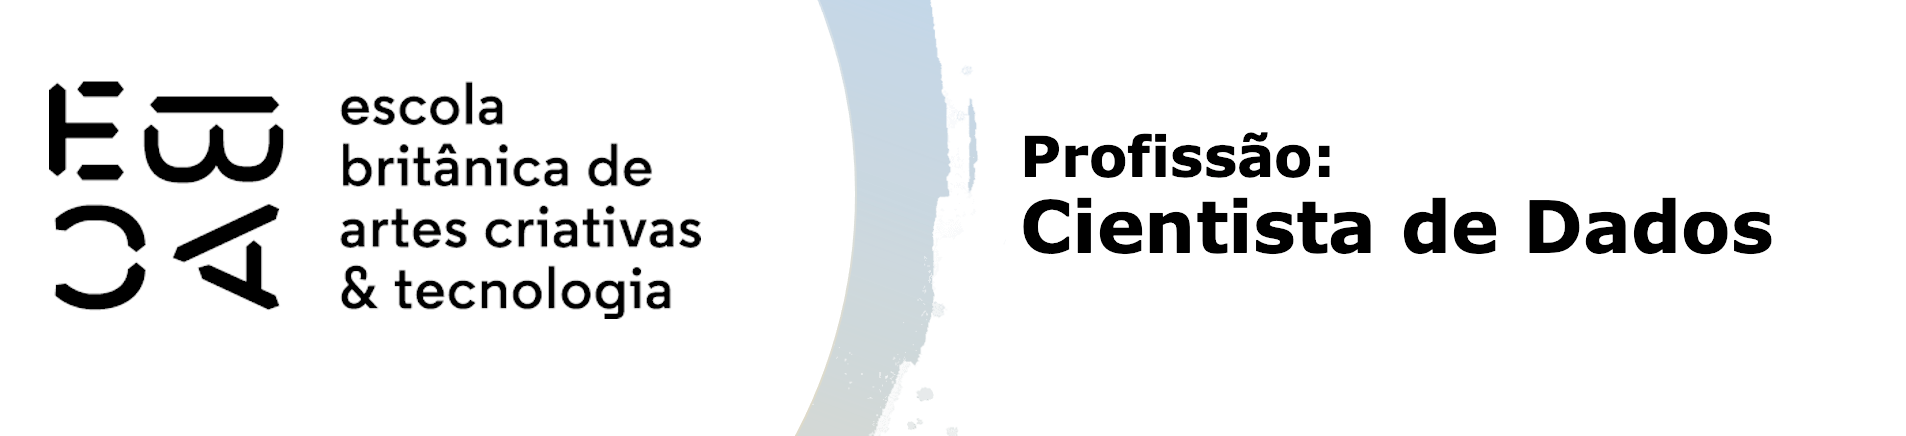

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

In [3]:
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [6]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [49]:
peng_num["Grupo"] = clus.labels_
peng_merged = peng.merge(peng_num["Grupo"], how='left', on='id')
peng_merged["Grupo"] = peng_merged["Grupo"].map({0.0: "0", 1.0: "1", 2.0: "2"})
peng_merged

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0


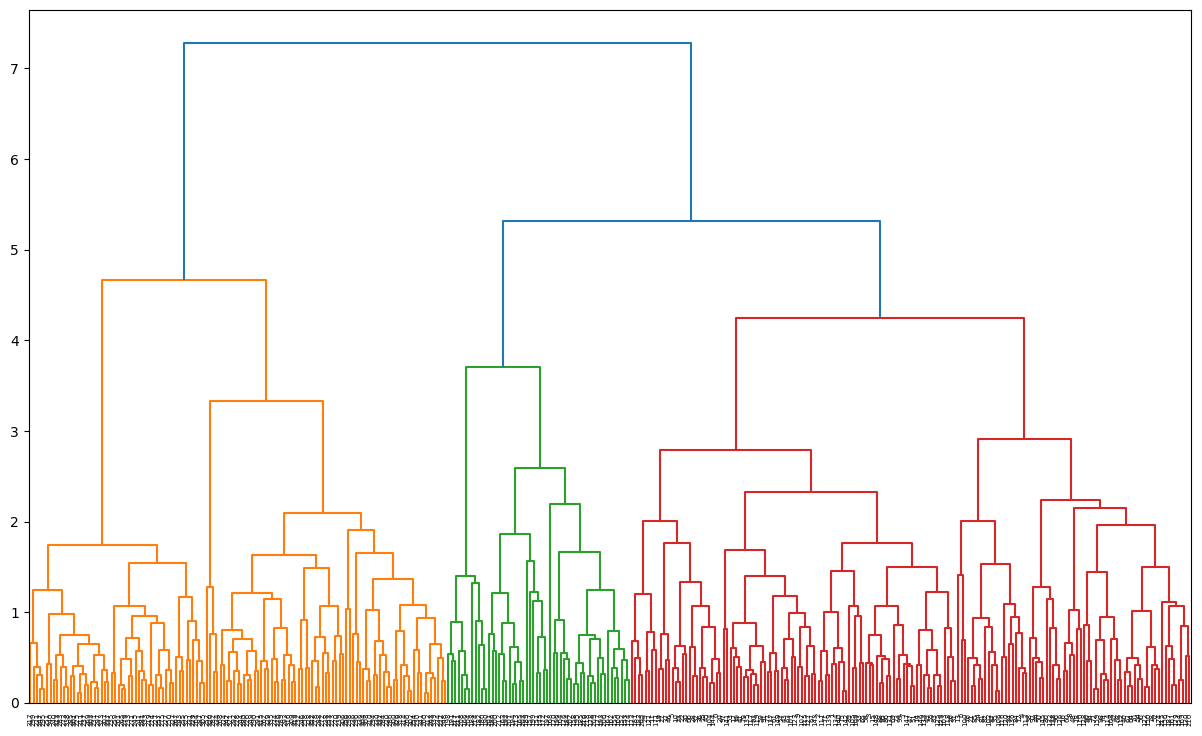

In [34]:
plt.figure(figsize=(15, 9))
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [50]:
pd.crosstab(peng_merged["Grupo"], peng_merged["species"])

species,Adelie,Chinstrap,Gentoo
Grupo,,,
0,0,0,123
1,151,14,0
2,0,54,0


In [52]:
quant = peng_merged.select_dtypes(include="number").columns
quant

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

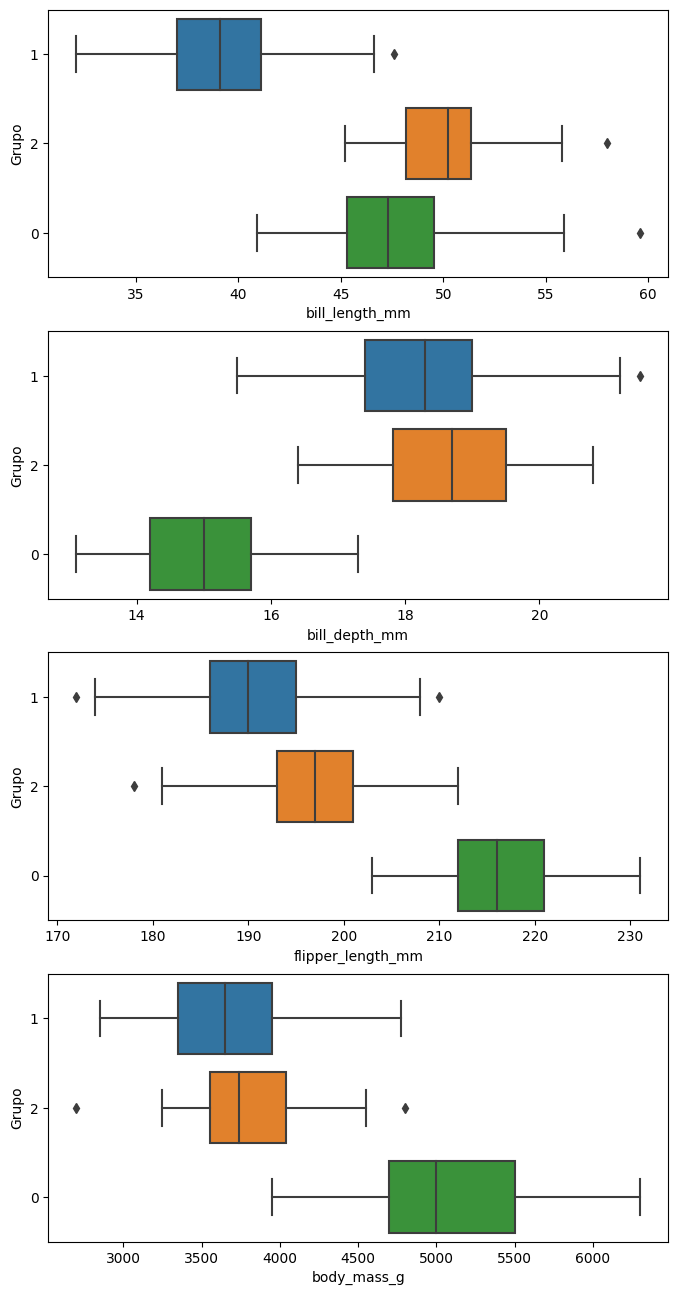

In [89]:
fig, axes = plt.subplots(nrows=4, figsize=(8, 16))
for i, q in enumerate(quant):
    sns.boxplot(data=peng_merged, y="Grupo", x=quant[i], ax=axes[i])

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [103]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=5)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [104]:
peng_num["Grupo"] = clus.labels_
peng_merged = peng.merge(peng_num["Grupo"], how='left', on='id')
peng_merged["Grupo"] = peng_merged["Grupo"].map({0.0: "0", 1.0: "1", 2.0: "2", 3.0: "3", 4.0: "4"})
peng_merged

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,4
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,4
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,4
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,4
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,3
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1


In [105]:
pd.crosstab(peng_merged["Grupo"], peng_merged["species"])

species,Adelie,Chinstrap,Gentoo
Grupo,,,
0,0,54,0
1,0,0,71
2,60,9,0
3,0,0,52
4,91,5,0


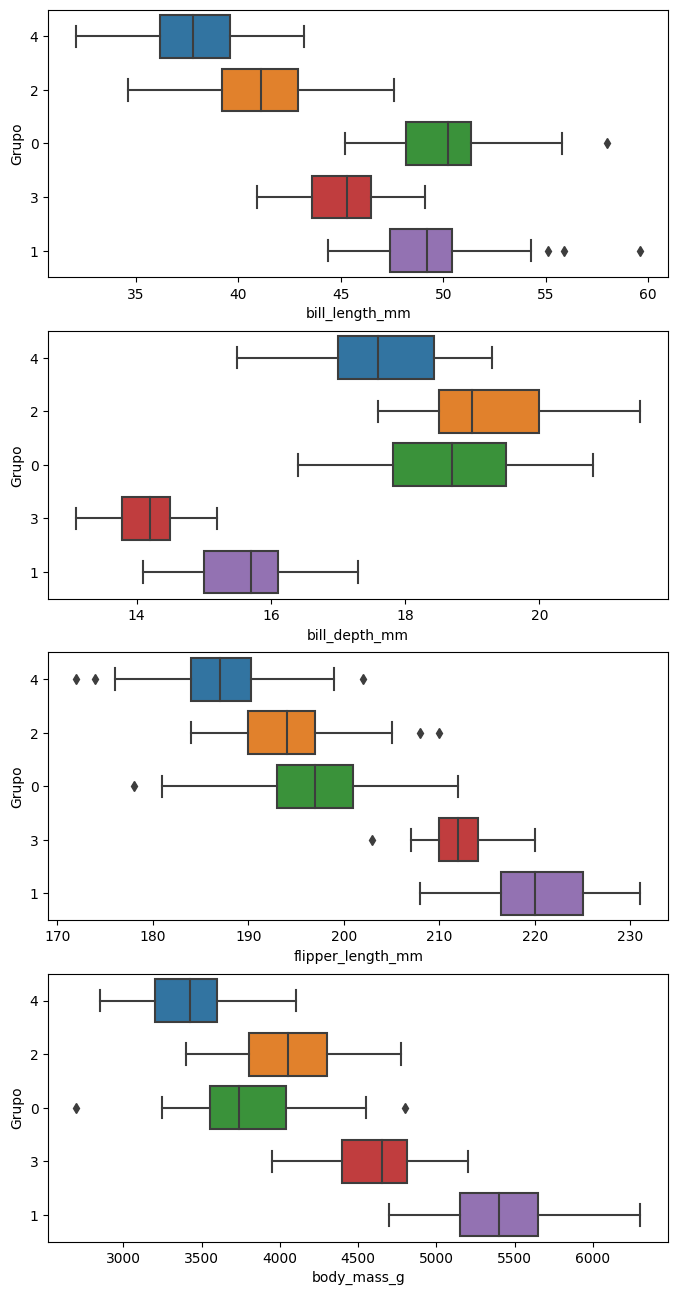

In [106]:
fig, axes = plt.subplots(nrows=4, figsize=(8, 16))
for i, q in enumerate(quant):
    sns.boxplot(data=peng_merged, y="Grupo", x=quant[i], ax=axes[i])

Observamos que ao dividir em 5 grupos criamos dois subgrupos bem definidos de Adelie e de Gentoo, o que sugere que é possível ver padrões diferentes dentro da mesma espécie, onde um subgrupos apresenta dimensões gerais menores que o outro.